In [ ]:
import wikipedia as wiki
import pandas as pd

In [ ]:
supported_languages = {
    'bg': 'Bulgarian',
    'cs': 'Czech',
    'da': 'Danish',
    'de': 'German',
    'el': 'Modern Greek',
    'en': 'English',
    'es': 'Spanish',
    'et': 'Estonian',
    'fi': 'Finnish',
    'fr': 'French',
    'hu': 'Hungarian',
    'it': 'Italian',
    'lt': 'Lithuanian',
    'lv': 'Latvian',
    'nl': 'Dutch',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'sv': 'Swedish'
}

In [ ]:
data = pd.DataFrame()
for key,language in supported_languages.items():
  print(f"{language}:")
  wiki.set_lang(key)
  articles = wiki.random(300)
  sentences = []

  for article in articles:
      print(f"Article: {article}:")
      try:
          suggested_articles = wiki.search(article, suggestion=True)[0]
          print(f"Suggested Article: {suggested_articles}:")

          p = wiki.page(suggested_articles[0])

          for sentence in p.content.split('.'):
              sentences.append(sentence)

          new_df = pd.DataFrame({
              'Sentence': sentences,
              'Language': language
          })

          data = pd.concat([data, new_df], ignore_index=True)

      except Exception as e:
          print(f"Error occurred with article '{article}': {e}")
          continue



In [ ]:
data.to_csv("E:\languages.csv", index=False)

In [4]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [18]:
data = pd.read_csv("E:\languages.csv")

In [21]:
data.dropna(inplace=True)

# Step 2: Define a function to check if a string is numeric or contains digits
def is_numeric_or_digit(s):
    return any(char.isdigit() for char in s)

# Remove rows where 'text' is numeric or contains digits
data = data[~data['Sentence'].apply(lambda x: is_numeric_or_digit(str(x)))]

In [23]:
translate_table = dict((ord(char), None) for char in string.punctuation)

In [26]:
def clean_sentence(sentence):
    sentence = sentence.lower()  # Convert to lowercase
    sentence = re.sub(r"\d+", "", sentence)  # Remove digits
    sentence = sentence.translate(translate_table)  # Remove punctuation
    return sentence

In [29]:
data['Sentence'] = data['Sentence'].apply(clean_sentence)
data = data[data['Sentence'].str.len() > 0]

In [30]:
data['Language'].value_counts()

Language
English       10504
Bulgarian      9947
Polish         9588
Hungarian      9285
Romanian       8827
German         8244
Latvian        8041
Spanish        6873
Finnish        6492
Portuguese     6233
Dutch          6150
Danish         5734
Czech          5629
French         5416
Slovenian      5366
Name: count, dtype: int64

C:\Users\msi\AppData\Local\Temp\ipykernel_16056\493556914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Language'], data=data, palette="hls")


<Axes: xlabel='Language', ylabel='count'>

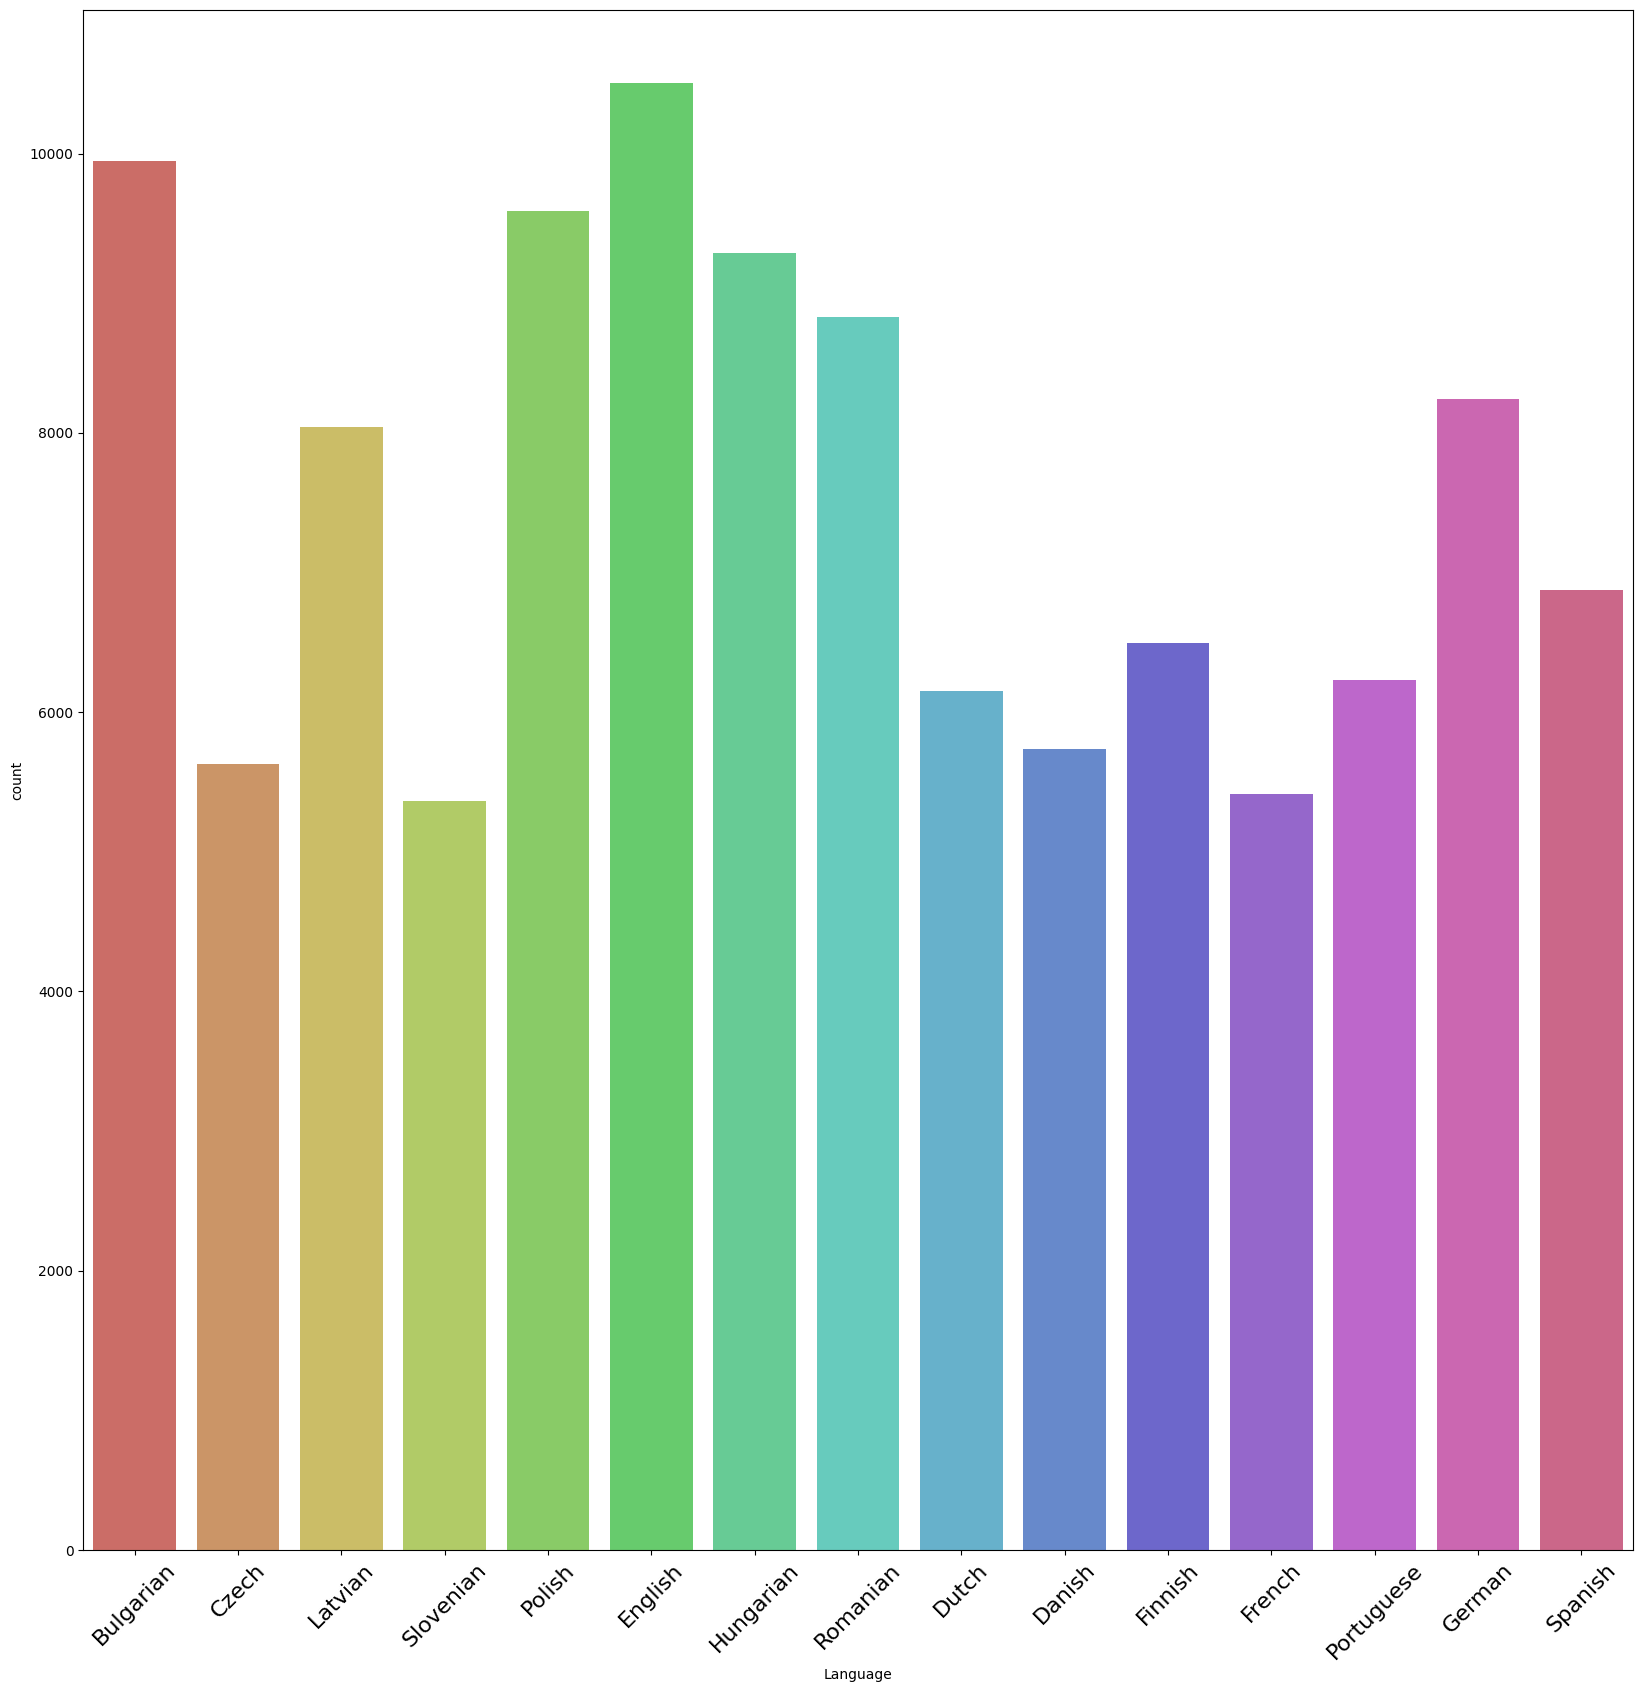

In [31]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45, fontsize=16) 
sns.countplot(x = data['Language'], data=data, palette="hls")

In [32]:
x = data.iloc[:,0] # Independent Variable
y = data.iloc[:,1] # Dependent Variable

In [68]:
x.head()

0                    състав на парламента вж протоколи
1    одобряване на протокола от предишното заседани...
2                    състав на парламента вж протоколи
3                проверка на пълномощията вж протоколи
4                    внасяне на документи вж протоколи
Name: Sentence, dtype: object

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [35]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [36]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [37]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [38]:
pipe_lr.fit(x_train, y_train)

C:\Users\msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

In [39]:
lr_predicted = pipe_lr.predict(x_test)

In [40]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 96.98210629395531 % accuracy


In [41]:
mnb_predicted = pipe_mnb.predict(x_test)

In [42]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 96.72393839579809 % accuracy


In [43]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1910    2    0    0   33    0    4   12    8    2   11    1   42    2
     8]
 [   9 1079    0    0    9    0    0    6    7    0    4    0   12    5
     5]
 [   0    0 1144    0    2    0    0    0    0    0    2    1    0    0
     0]
 [   0    0    0 1231    0    0    1    2    0    0    0    0    0    0
     0]
 [  11    1    0    0 2101    0    2    1    0    0    1    0    5    3
     2]
 [   0    0    0    0    1 1299    1    2    1    0    0    0    0    0
     0]
 [   4    0    1    0    2    0 1062    0    2    0    0    0    6    0
     1]
 [   0    0    0    0    1    0    0 1655    0    4    0    0    2    0
     0]
 [   9    2    1    0   18    0    4    4 1839    1    5    1   14    0
     3]
 [   9    3    0    0   11    0    3    3    5 1518    6    0   19    1
     6]
 [  13    2    0    0   15    0    2    5    8    2 1834    1   17    2
     9]
 [   0    0    0    0    0    0    0    1    1    1    0 1212    3    0
     8]
 [  51    2    0    

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


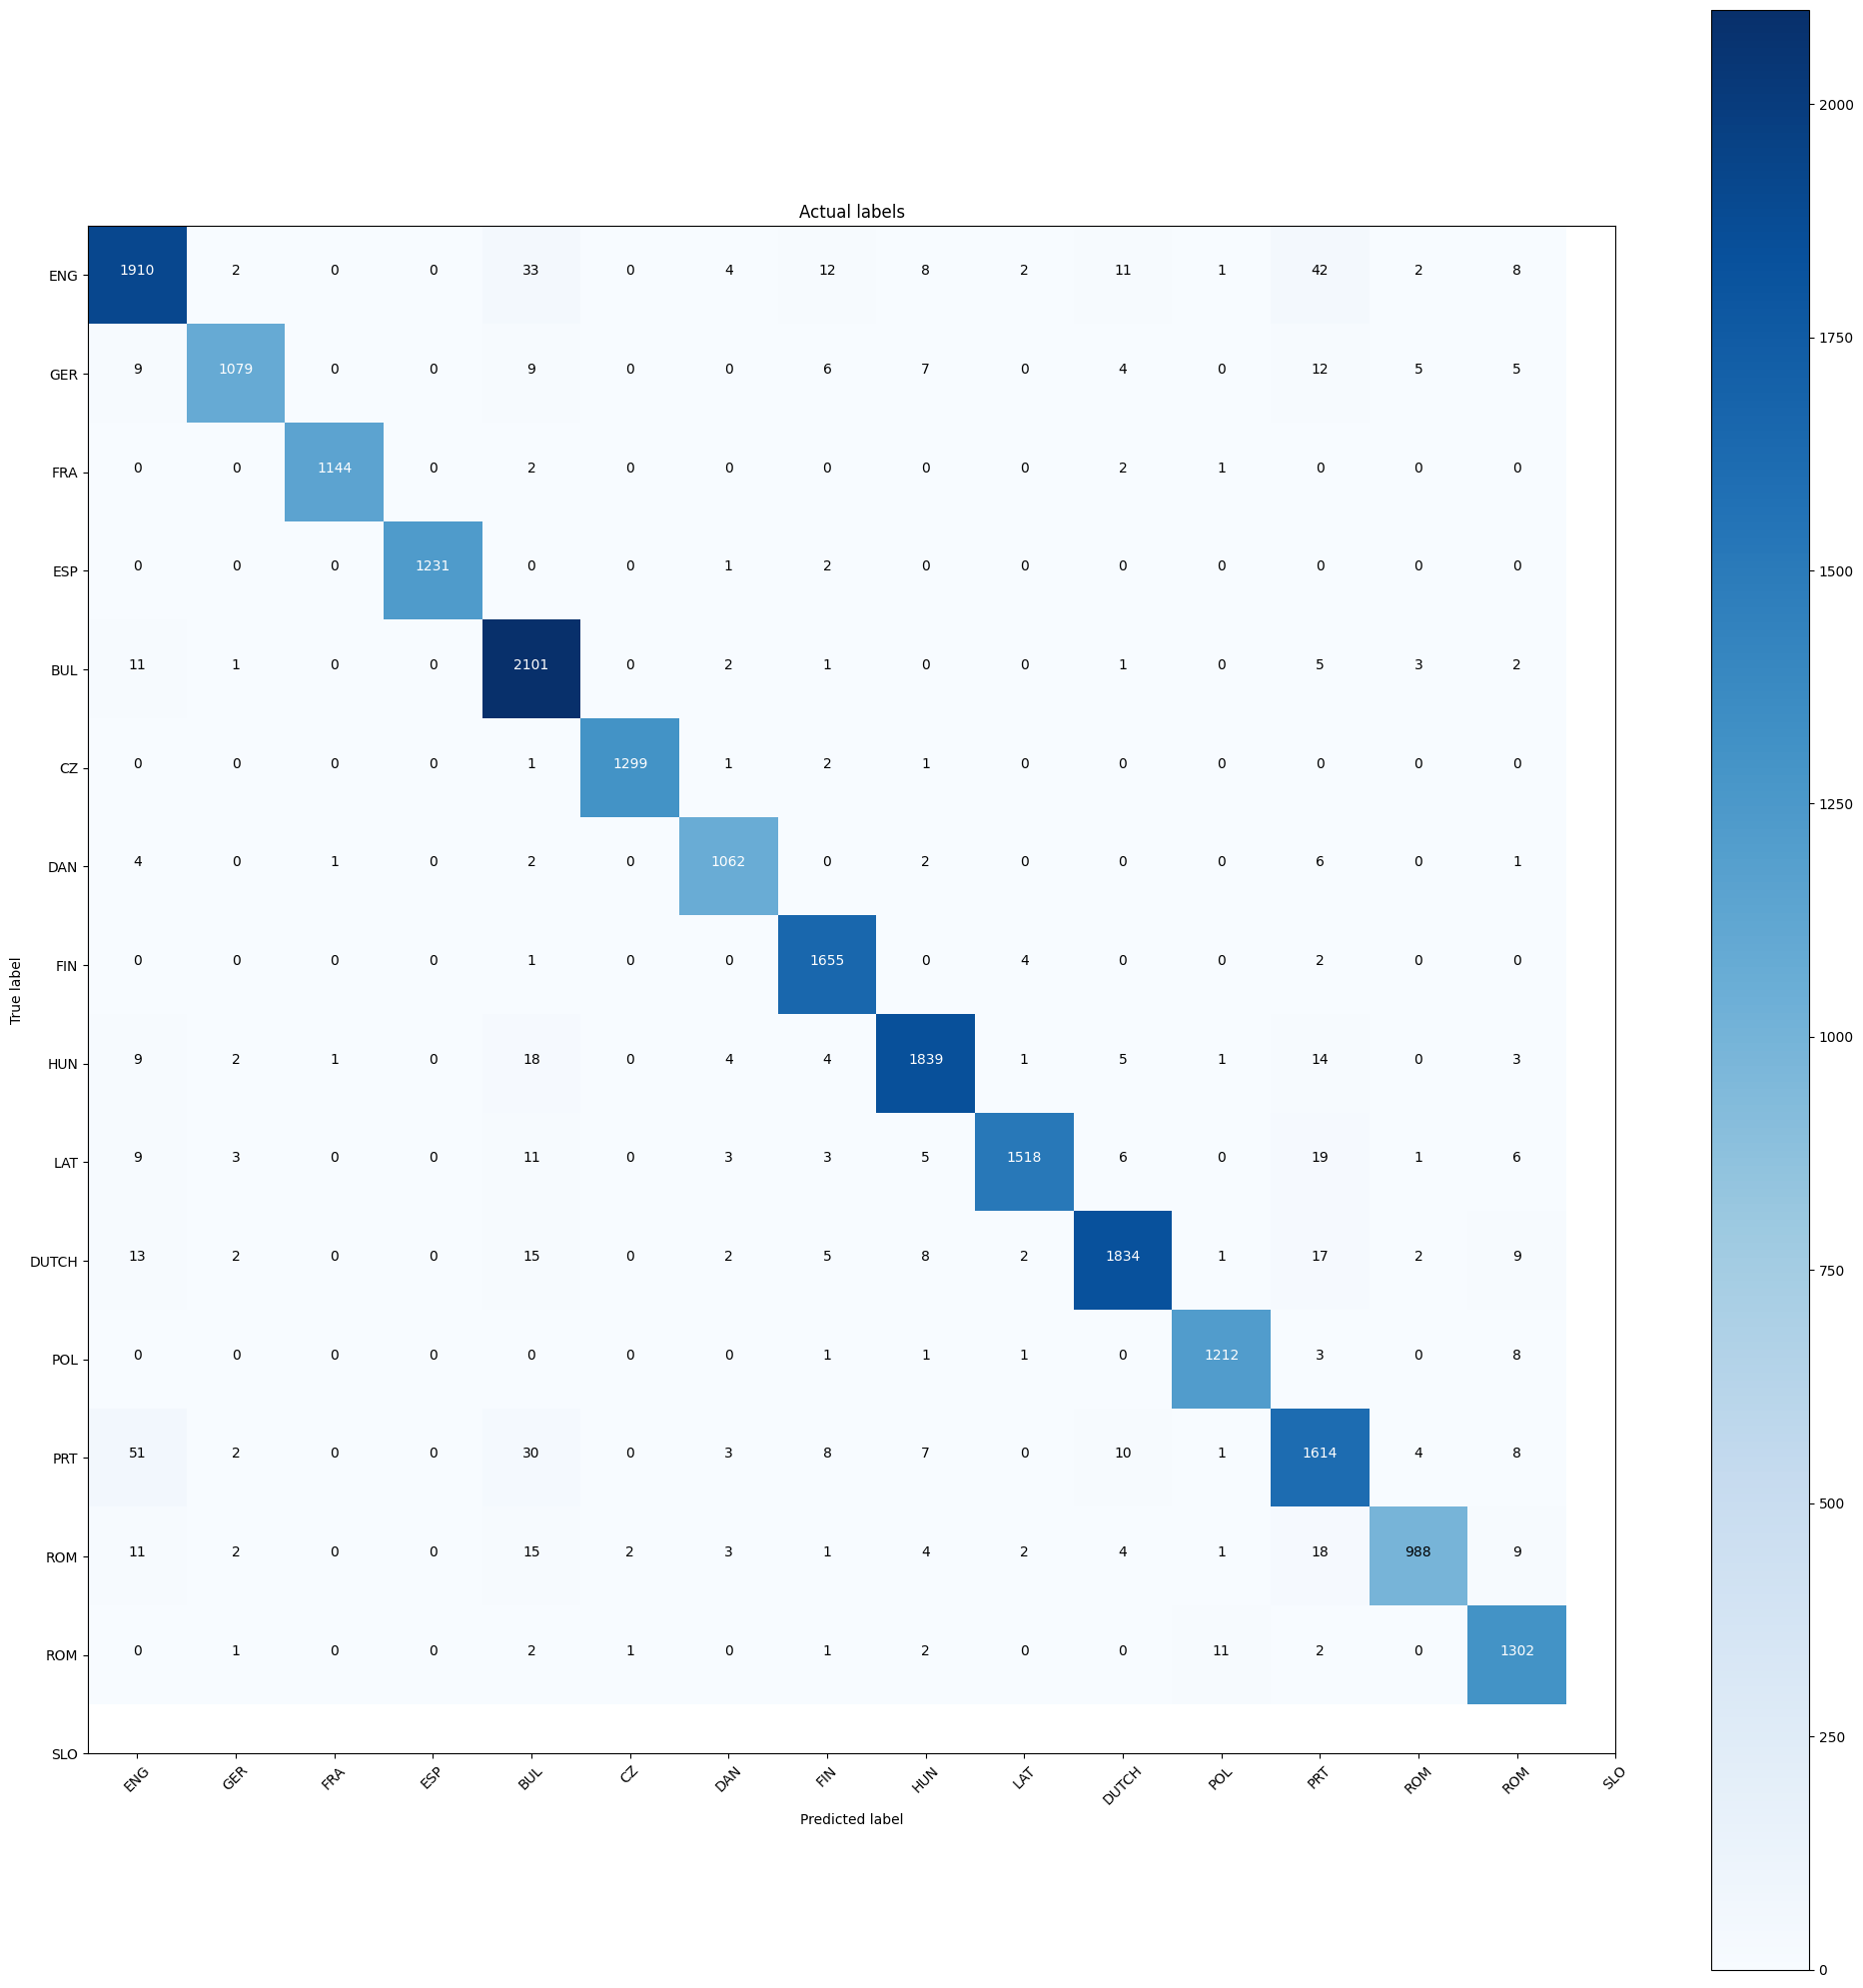

In [45]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'FRA', 'ESP','BUL','CZ','DAN','FIN','HUN','LAT','DUTCH','POL','PRT','ROM','ROM','SLO'])

In [46]:
import pickle

In [47]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()

In [83]:
pipe_lr.predict(pd.Series(["bonjour monsieur"]))[0]


'French'